### Visualising multidimensional data

In [77]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

from scipy import stats
from IPython.display import display, HTML
import statsmodels.api as sm
from statsmodels.formula.api import ols

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

You should by now be quite happy about working with and plotting one or two factors against annother.  However, in biology is it common to be dealing with datasets with many parameters.  For example, the expression level of thousands of genes across many tissues, or the frequency of hundreds of species in hundreds of sites, or tens of measurements across hundreds of beaks.  Multivariant Analysis is a way of managing and visualising such large datasets.  We will cover correlations across large datasets, heatplots to visualisae them, heirarthical clustering and PCA

Start with a couple of toy examples to explore distance and clustering methods.

In [43]:
data = {'test_score': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'head_diameter': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = pd.DataFrame(data, columns=['test_score', 'head_diameter'])
print(df)

    test_score  head_diameter
0           25             79
1           34             51
2           22             53
3           27             78
4           33             59
..         ...            ...
25          45              5
26          38             29
27          43             27
28          51              8
29          46              7

[30 rows x 2 columns]


<AxesSubplot:xlabel='test_score', ylabel='head_diameter'>

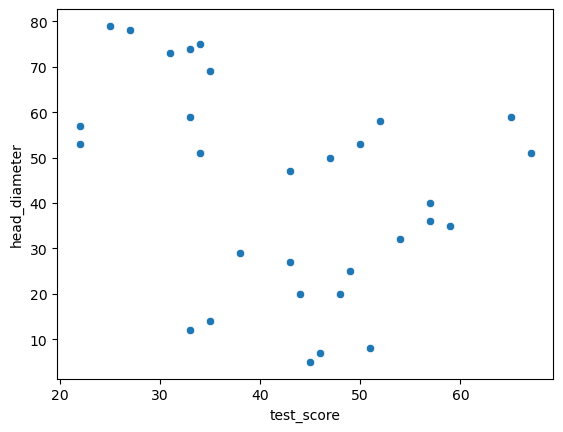

In [37]:
sns.scatterplot(data=df, x="test_score", y="head_diameter")

#### basic hierarchical

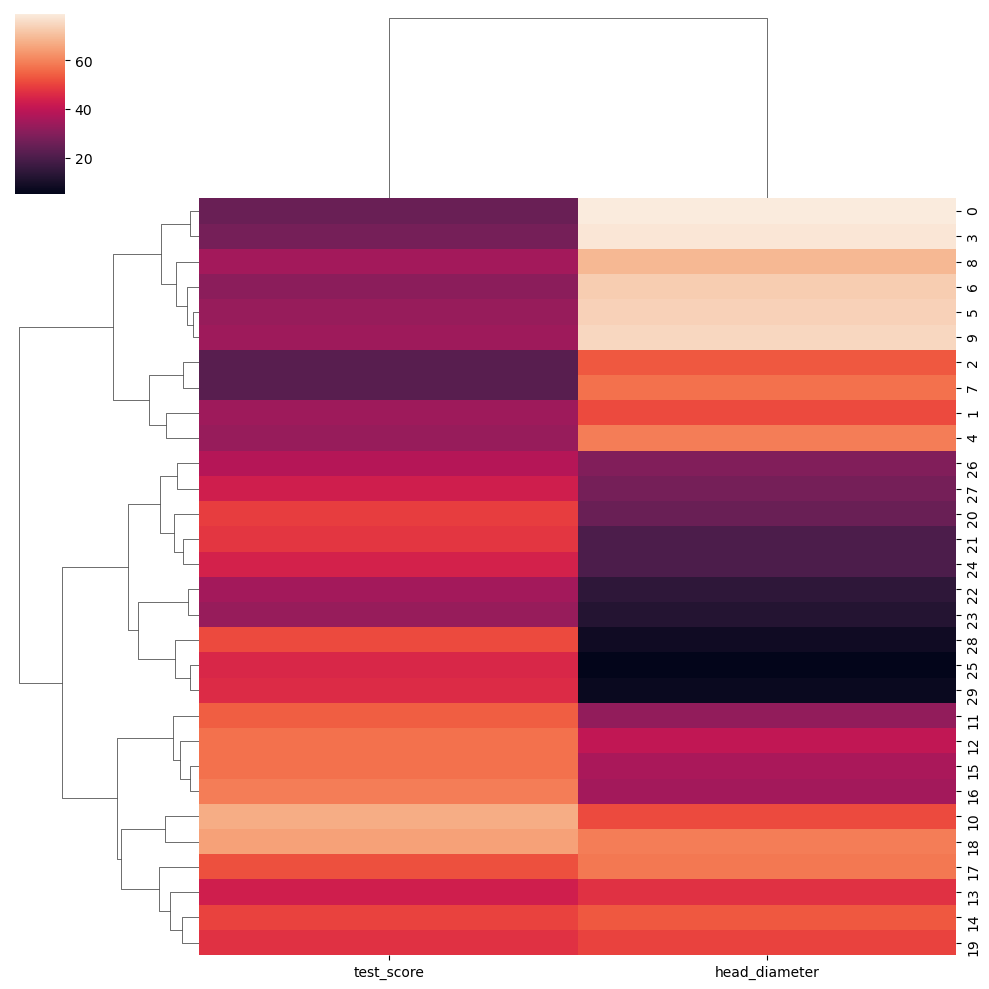

In [44]:
sns.clustermap(df)

Yes, it is that easy.  You can explore the effect of different distance measures and clustering methods

In [ ]:
clustering method (method) - average, complete, single, weighted
Distance measure (metric) jaccard, cityblock, minkowski, braycurtis

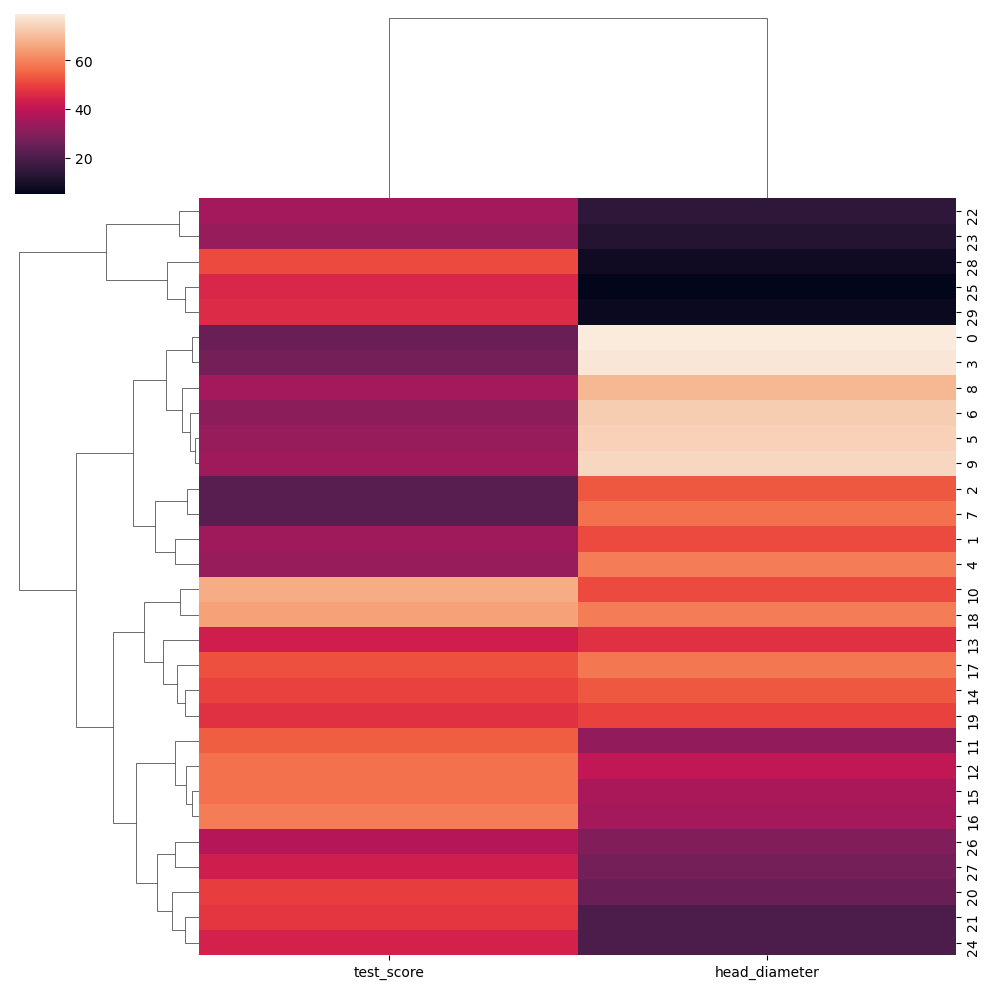

In [58]:
sns.clustermap(df, method='weighted', metric='braycurtis')

#### basic k-means

Find the centroids of clusters in the data.  sklearn fits the data into as many clusters as you specify.  It can then compute the centroid of each cluster.

In [63]:
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)


[[38.75       61.625     ]
 [47.07142857 22.14285714]]


In [69]:
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [67]:
type(centroids)

numpy.ndarray

In [68]:
centroids

array([[38.75      , 61.625     ],
       [47.07142857, 22.14285714]])

Add the centroids to the data plot.  
The datapoints are coloured by the labels in the kmeans output.  
The centroids are plotted on the same plot.

[[38.75       61.625     ]
 [47.07142857 22.14285714]]


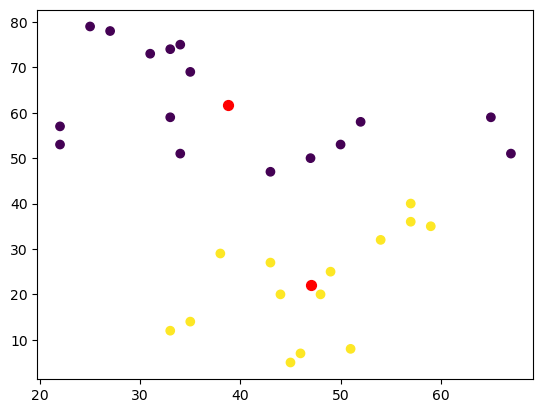

In [62]:
plt.scatter(df['test_score'], df['head_diameter'], c= kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Try looking for differnt numbers of clusters

[[29.6 66.8  1.   2.   1.8]
 [43.2 16.7  0.   1.   0. ]
 [55.1 46.1  0.6  0.   2. ]]


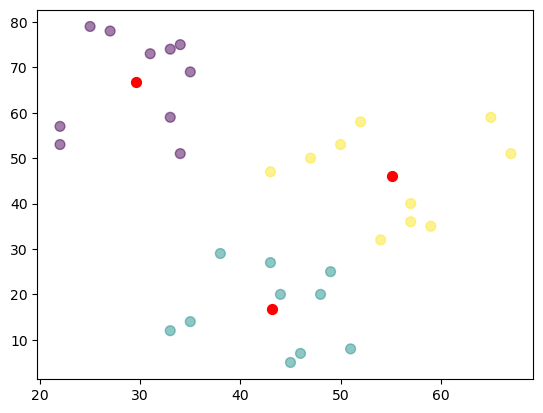

In [87]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['test_score'], df['head_diameter'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


[[55.1        46.1         0.6         0.          2.        ]
 [43.2        16.7         0.          1.          0.        ]
 [30.83333333 74.66666667  1.          2.          1.        ]
 [27.75       55.          1.          2.          3.        ]]


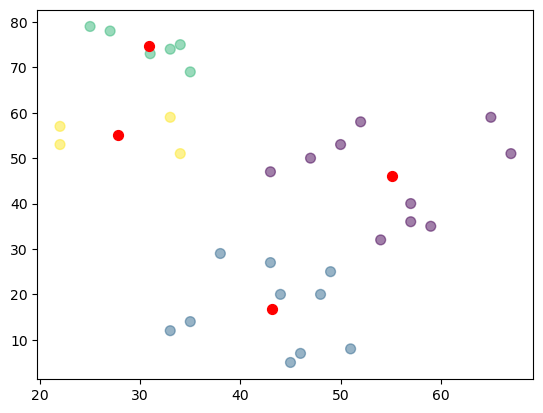

In [86]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['test_score'], df['head_diameter'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


Now we have found clusters we can test their significance

Add the cluster categorisation to the dataframe.  
Do a test for significance of head diameter and test scores in each case.  

In [89]:
kmeans = KMeans(n_clusters=2).fit(df)
df['bi_group'] = kmeans.labels_.astype(str)

In [90]:
kmeans = KMeans(n_clusters=3).fit(df)
df['tri_group'] = kmeans.labels_.astype(str)

In [91]:
kmeans = KMeans(n_clusters=4).fit(df)
df['quad_group'] = kmeans.labels_.astype(str)

In [92]:
df.head(3)

,test_score,head_diameter,bi_group,tri_group,quad_group
0,25,79,0,1,3
1,34,51,0,1,0
2,22,53,0,1,0


In [101]:
mod = ols('test_score ~ bi_group', data=df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
bi_group,1.0,517.038095,517.038095,3.795841,0.061467
Residual,28.0,3813.928571,136.211735,NaN,NaN


In [102]:
mod = ols('test_score ~ tri_group', data=df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
tri_group,2.0,3256.066667,1628.033333,40.893944,6.754193e-09
Residual,27.0,1074.900000,39.811111,NaN,NaN


In [103]:
mod = ols('test_score ~ quad_group', data=df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
quad_group,3.0,3278.883333,1092.961111,27.010207,3.777105e-08
Residual,26.0,1052.083333,40.464744,NaN,NaN


The groupings with three and four clusters both look good, but three clusters is the best fit.

### A more complex clustering

Here is a basic dataset of expression patterns for a set of biosynthetic genes from a range of plant tissues.

In [7]:
df = pd.read_csv('../Datasets/TPS.csv')
df.head(3)

,Gene,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,Female.flower.B.conchifolia.rep1,67.311275,0.0,15.645225,0.660818,0,0.0,0,0.0,0,...,0,22.447206,0,0,0.188740,1.391640,3.125789,0.0,0.940281,0
1,Female.flower.B.conchifolia.rep2,24.881496,0.0,3.396060,0.000000,0,0.0,0,0.0,0,...,0,13.809320,0,0,0.000000,0.964168,1.100803,0.0,0.000000,0
2,Female.flower.B.conchifolia.rep3,0.000000,0.0,4.865841,0.101612,0,0.0,0,0.0,0,...,0,3.518609,0,0,0.437499,0.910456,0.333213,0.0,0.000000,0


We will make the sample data rows more useful by splitting into groups

In [8]:
new = df["Gene"].str.split(".B.|.rep", n = 2, expand = True)
new.head(3)

,0,1,2
0,Female.flower,conchifolia,1
1,Female.flower,conchifolia,2
2,Female.flower,conchifolia,3


and giving the new columns useful names

In [9]:
# Dropping old Name columns
df.drop(columns =["Gene"], inplace = True)
df.insert(0,'Tissue', new[0] )
df.insert(0,'Species', new[1] )
df.insert(0,'Rep', new[2] )
df.head(3)

,Rep,Species,Tissue,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,1,conchifolia,Female.flower,67.311275,0.0,15.645225,0.660818,0,0.0,0,...,0,22.447206,0,0,0.188740,1.391640,3.125789,0.0,0.940281,0
1,2,conchifolia,Female.flower,24.881496,0.0,3.396060,0.000000,0,0.0,0,...,0,13.809320,0,0,0.000000,0.964168,1.100803,0.0,0.000000,0
2,3,conchifolia,Female.flower,0.000000,0.0,4.865841,0.101612,0,0.0,0,...,0,3.518609,0,0,0.437499,0.910456,0.333213,0.0,0.000000,0


In [4]:
df.head()

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase,Tissue,species,Rep
0,67.311275,0.0,15.645225,0.660818,0,0.0,0,0.0,0,140.151858,...,0,0.188740,1.391640,3.125789,0.000000,0.940281,0,Female.flower,conchifolia,1
1,24.881496,0.0,3.396060,0.000000,0,0.0,0,0.0,0,168.266137,...,0,0.000000,0.964168,1.100803,0.000000,0.000000,0,Female.flower,conchifolia,2
2,0.000000,0.0,4.865841,0.101612,0,0.0,0,0.0,0,178.561685,...,0,0.437499,0.910456,0.333213,0.000000,0.000000,0,Female.flower,conchifolia,3
3,0.000000,0.0,9.810125,0.140581,0,0.0,0,0.0,0,35.867421,...,0,0.296516,1.205079,0.819789,0.000000,0.884948,0,Leaf,conchifolia,1
4,0.000000,0.0,8.091472,1.800174,0,0.0,0,0.0,0,40.712185,...,0,0.000000,0.800220,2.437815,0.700965,2.614249,0,Leaf,conchifolia,2


In [5]:
df.describe()

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
count,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.0,36.000000,36.0,36.000000,...,36.0,36.000000,36.0,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,49.655797,2.994775,8.844578,0.537160,0.0,1.194785,0.0,1.712132,0.0,168.296520,...,0.0,6.640752,0.0,0.0,1.282518,1.690958,7.241468,0.202839,6.348424,0.0
std,146.008415,4.959268,3.508785,0.979806,0.0,2.582390,0.0,2.601749,0.0,103.882396,...,0.0,17.353320,0.0,0.0,3.359908,2.262099,18.535442,0.777848,19.487094,0.0
min,0.000000,0.000000,2.785489,0.000000,0.0,0.000000,0.0,0.000000,0.0,16.280952,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,5.470198,0.000000,0.0,0.000000,0.0,0.000000,0.0,118.316571,...,0.0,0.201176,0.0,0.0,0.000000,0.407832,0.452119,0.000000,0.000000,0.0
50%,0.000000,0.360312,8.899535,0.079268,0.0,0.000000,0.0,0.202499,0.0,147.455481,...,0.0,0.421347,0.0,0.0,0.275829,0.896740,0.830992,0.000000,0.497733,0.0
75%,1.646738,4.602375,11.469944,0.621480,0.0,0.392406,0.0,2.430931,0.0,191.264679,...,0.0,1.172816,0.0,0.0,0.758830,1.790371,3.299946,0.000000,2.348776,0.0
max,775.748743,20.639070,15.645225,3.767931,0.0,8.317929,0.0,8.911507,0.0,552.243608,...,0.0,69.053289,0.0,0.0,19.109890,9.247095,94.998578,4.620112,106.685782,0.0


We could try to pairplot everything against everything, but with nearly 100 genes it would be a strain.

In [ ]:
# Do not run!
# sns.pairplot(df, hue="Tissue")

KeyboardInterrupt: 

We could plot expression of individual genes.  Which would be interesting

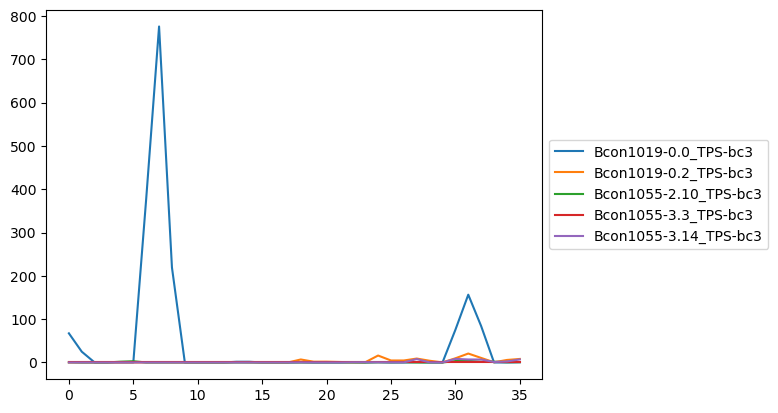

In [35]:
ax = df[["Bcon1019-0.0_TPS-bc3","Bcon1019-0.2_TPS-bc3","Bcon1055-2.10_TPS-bc3","Bcon1055-3.3_TPS-bc3","Bcon1055-3.14_TPS-bc3"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

To cluster we need to define which are the dependant and which the independant variables.   

The independent variable is the cause. Its value is independent of other variables in your study.
The dependent variable is the effect. Its value depends on changes in the independent variable.

The independant variables are the genes.  They are the categroeis we are collectin data for.
In this case the dependant variable is the transcripts per million (TPM) for each sample. This is the data we are gathering. The samples are defined by tissue and replicate.


In [10]:
#Splitting dependant and independant variables
X = df.loc[:, "Bcon1019-0.0_TPS-bc3":]  # gathers ALL the gene columnsw, independent variables data
Y = df.loc[:, "Rep":"Tissue"]  # Gathers the 3 columsn of dependent variable data

In [12]:
Y.head(3)

,Rep,Species,Tissue
0,1,conchifolia,Female.flower
1,2,conchifolia,Female.flower
2,3,conchifolia,Female.flower


In [11]:
X.head(3)

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,67.311275,0.0,15.645225,0.660818,0,0.0,0,0.0,0,140.151858,...,0,22.447206,0,0,0.188740,1.391640,3.125789,0.0,0.940281,0
1,24.881496,0.0,3.396060,0.000000,0,0.0,0,0.0,0,168.266137,...,0,13.809320,0,0,0.000000,0.964168,1.100803,0.0,0.000000,0
2,0.000000,0.0,4.865841,0.101612,0,0.0,0,0.0,0,178.561685,...,0,3.518609,0,0,0.437499,0.910456,0.333213,0.0,0.000000,0


We can examine mean expression level of each gene across all samples

In [45]:
X.apply(np.mean)

Bcon1019-0.0_TPS-bc3                                                 49.655797
Bcon1019-0.2_TPS-bc3                                                  2.994775
Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein     8.844578
Bcon1055-2.10_TPS-bc3                                                 0.537160
Bcon1055-3.1_TPS-bc3                                                  0.000000
                                                                       ...    
Bcon983-1.7_TPS-bc2                                                   1.690958
Bcon995-0.5_TPS-bc3                                                   7.241468
Bcon995-0.6_TPS-bc3                                                   0.202839
Bcon995-0.7_TPS-bc3                                                   6.348424
Bcon1049-2.11_Geranyl diphosphate synthase                            0.000000
Length: 102, dtype: float64

We could look at covarience between groups using the methods from last week, and analyse whether there was more varation between species or tissues

However, we can also look at correlations across the whole matrix

In [13]:
corrmat = X.corr()
corrmat

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
Bcon1019-0.0_TPS-bc3,1.000000,-0.007390,0.238361,0.020721,NaN,0.012373,NaN,-0.082005,NaN,-0.118767,...,NaN,0.843876,NaN,NaN,-0.105836,-0.120104,0.007962,-0.060767,0.030317,NaN
Bcon1019-0.2_TPS-bc3,-0.007390,1.000000,0.304442,0.523585,NaN,0.716988,NaN,0.870053,NaN,0.101446,...,NaN,-0.188076,NaN,NaN,0.184807,-0.003356,0.304547,0.079291,0.365028,NaN
Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,0.238361,0.304442,1.000000,0.167268,NaN,0.165037,NaN,0.248240,NaN,-0.128220,...,NaN,0.190146,NaN,NaN,0.247651,-0.263418,0.106731,-0.143057,0.109730,NaN
Bcon1055-2.10_TPS-bc3,0.020721,0.523585,0.167268,1.000000,NaN,0.571354,NaN,0.394880,NaN,-0.129243,...,NaN,-0.138544,NaN,NaN,-0.092169,0.055433,0.373357,0.023627,0.397050,NaN
Bcon1055-3.1_TPS-bc3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bcon983-1.7_TPS-bc2,-0.120104,-0.003356,-0.263418,0.055433,NaN,0.215660,NaN,-0.029156,NaN,-0.025388,...,NaN,-0.198689,NaN,NaN,-0.009520,1.000000,0.465609,-0.119836,0.504609,NaN
Bcon995-0.5_TPS-bc3,0.007962,0.304547,0.106731,0.373357,NaN,0.510331,NaN,0.225552,NaN,-0.015845,...,NaN,-0.120811,NaN,NaN,-0.023087,0.465609,1.000000,0.025698,0.958235,NaN
Bcon995-0.6_TPS-bc3,-0.060767,0.079291,-0.143057,0.023627,NaN,0.085601,NaN,0.019361,NaN,0.020345,...,NaN,-0.067403,NaN,NaN,-0.063214,-0.119836,0.025698,1.000000,0.040376,NaN
Bcon995-0.7_TPS-bc3,0.030317,0.365028,0.109730,0.397050,NaN,0.574630,NaN,0.272506,NaN,0.018977,...,NaN,-0.104558,NaN,NaN,-0.009703,0.504609,0.958235,0.040376,1.000000,NaN


and this can be nicely displayed in a heatmap

<AxesSubplot:>

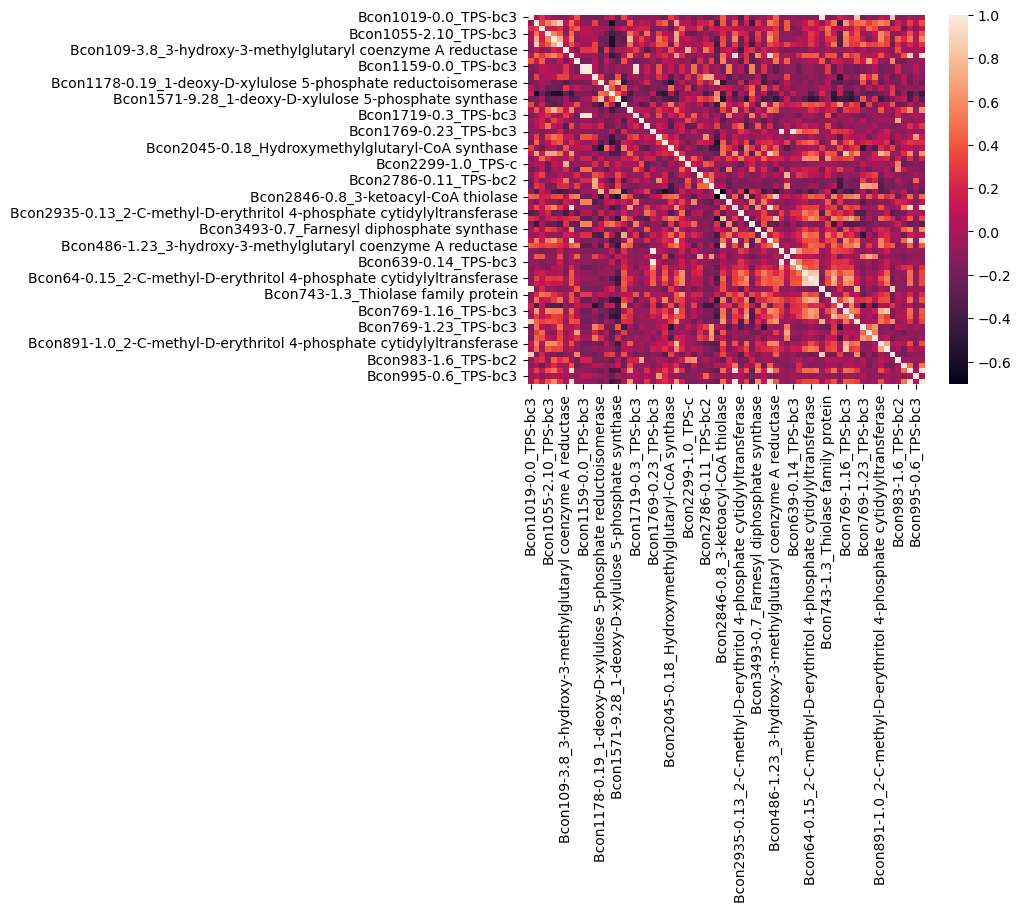

In [16]:
sns.heatmap(corrmat, vmax=1., square=False)

All these gaps are caused by genes which are not expressed.  If we remove the 'all zero' rows we get a clearer plot

<AxesSubplot:>

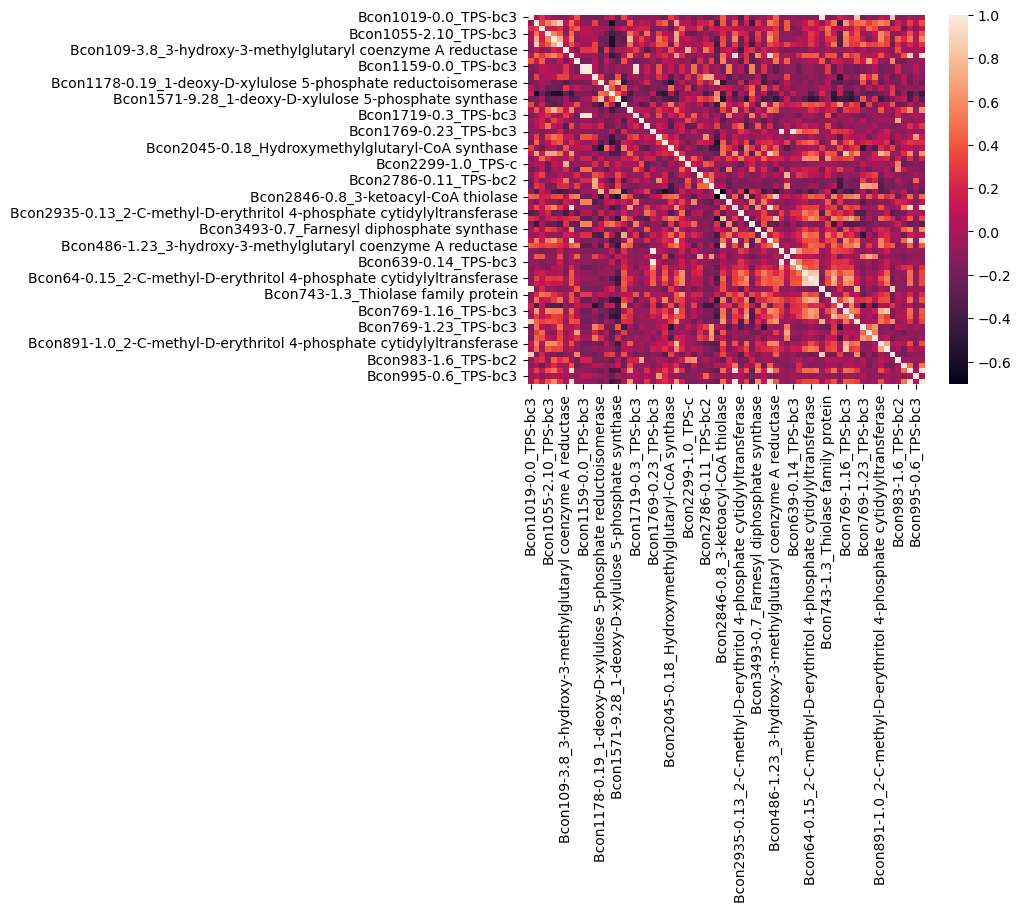

In [15]:
X = X.loc[:, (X != 0).any(axis=0)]
corrmat = X.corr()
sns.heatmap(corrmat, vmax=1., square=False)

But so messy!  

How can we order the heatmap plotting?  
For this we need to cluster the genes by the most similar.  


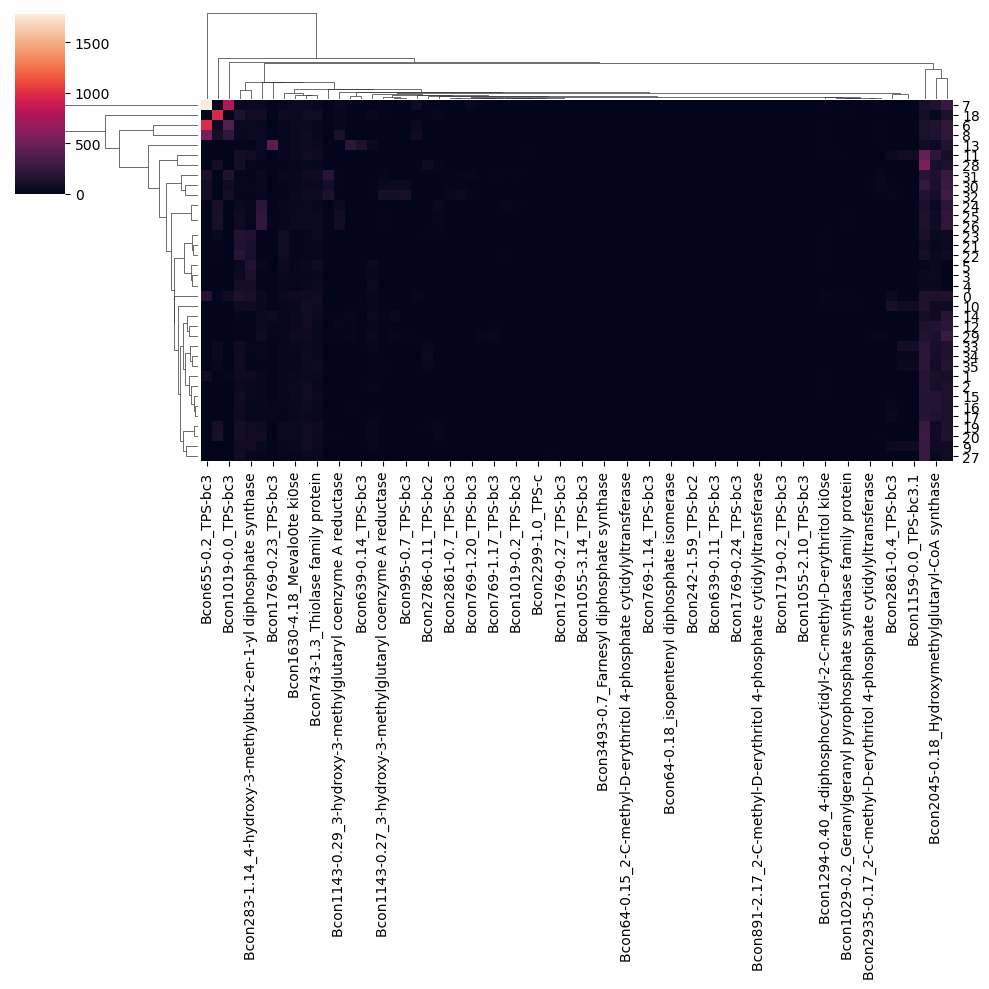

In [17]:
sns.clustermap(X)

Ah!  the plot is dominated by a few very highly expressed genes. One way round this is to change the ends of the color scale to the 2nd and 98th percentile values of the data, rather then the maximum and minimum.

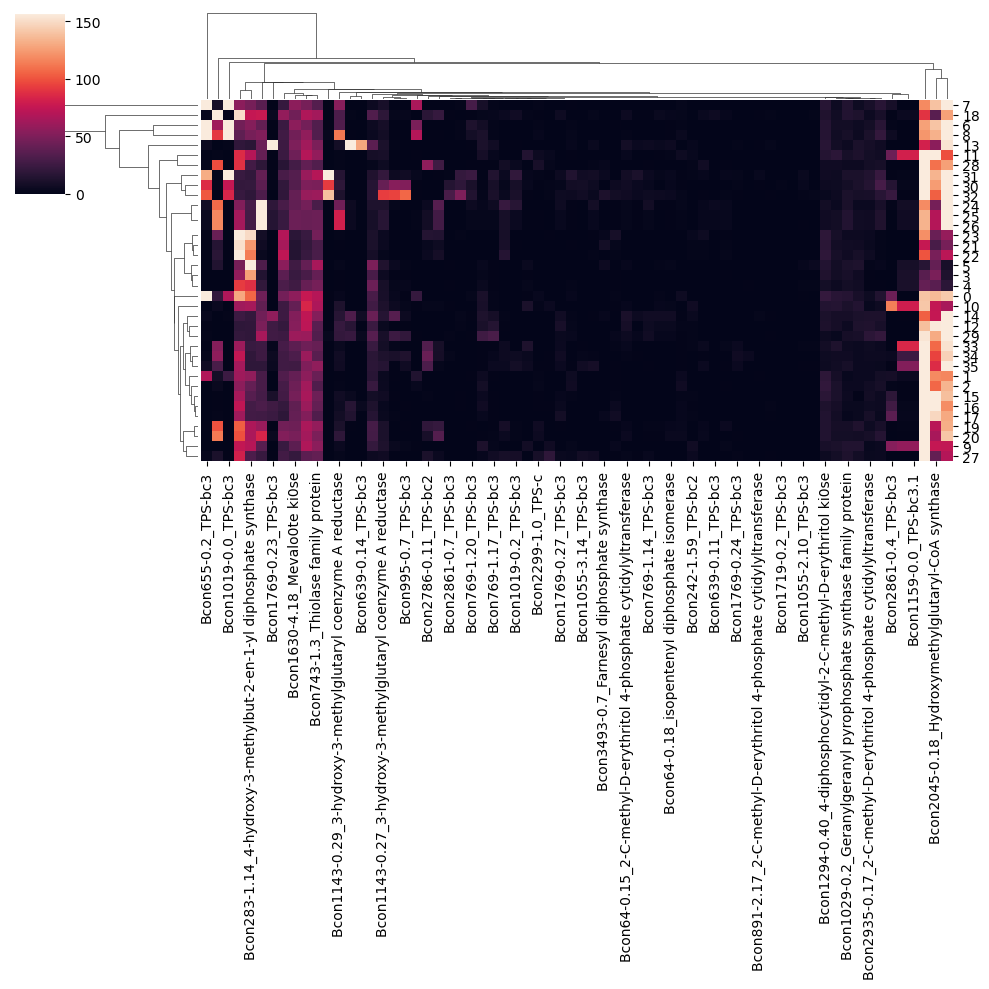

In [18]:
sns.clustermap(X, robust=True)

To see more pattern we need to standardise the dataframe.  We will use 'standard_scale =1' which , for each oclumn, subtracts the miniomum and divides by the maximum

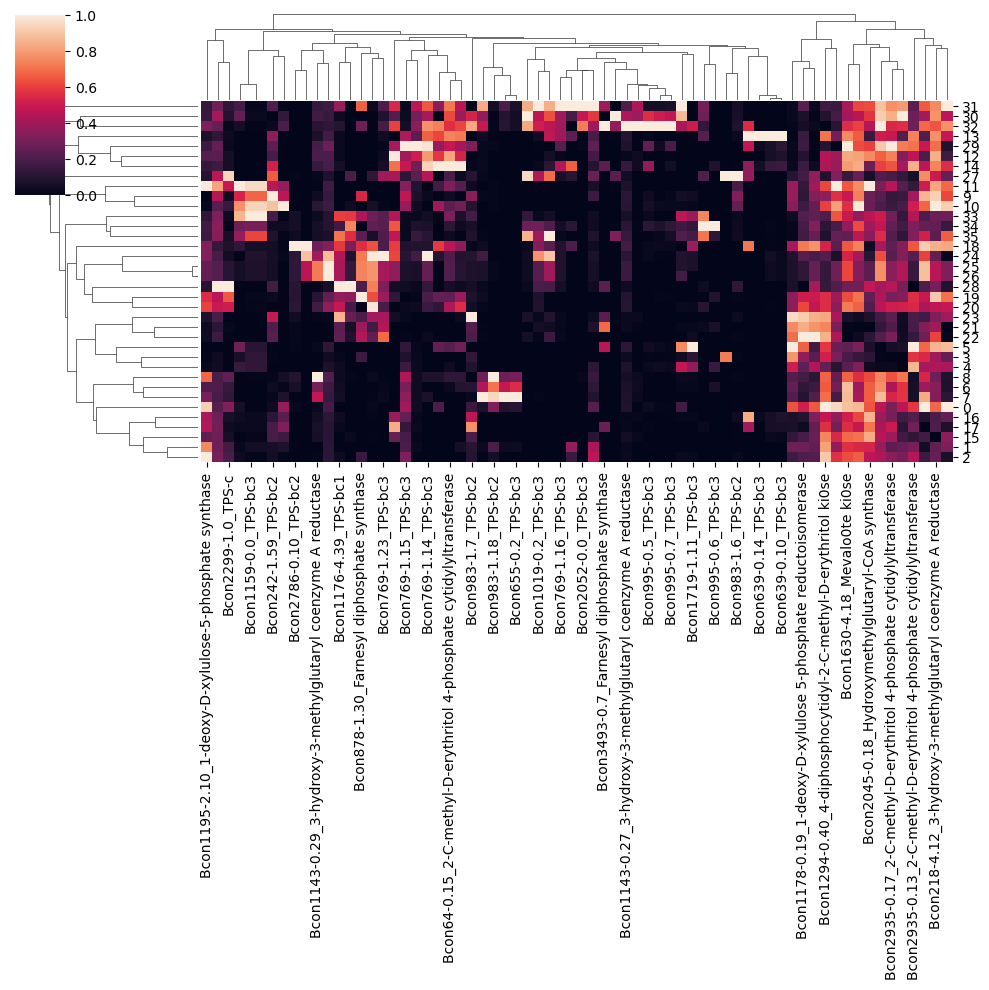

In [20]:
sns.clustermap(X, standard_scale = 1)

We can label the rows by tissue type, using a dictionary to look up the right colour for each label.  We get the set of unique values in each column, and give each of them a colour.  We then map these colour labels onto the series of 'Tissue' or 'Species'.

In [21]:
Y.head(3)

,Rep,Species,Tissue
0,1,conchifolia,Female.flower
1,2,conchifolia,Female.flower
2,3,conchifolia,Female.flower


In [24]:
Tissue = Y["Tissue"]
labels = Tissue.unique()
lut = dict(zip(set(labels), ['red','limegreen','deeppink','yellowgreen', 'saddlebrown', 'palegreen']))
row_colors = Tissue.map(lut)

In [25]:
Species = Y["Species"]
labels2 = Species.unique()
lut = dict(zip(set(labels2), ['orangered', 'lightgreen']))
row_colors2 = Species.map(lut)

In [132]:
Tissue.unique()

array(['Female.flower', 'Leaf', 'Male.flower', 'Petiole', 'Root',
       'Veg.bud'], dtype=object)

In [137]:
Species.unique()

array(['conchifolia', 'plebeja'], dtype=object)

In [147]:
row_colors2

0      orangered
1      orangered
2      orangered
3      orangered
4      orangered
         ...    
31    lightgreen
32    lightgreen
33    lightgreen
34    lightgreen
35    lightgreen
Name: Species, Length: 36, dtype: object

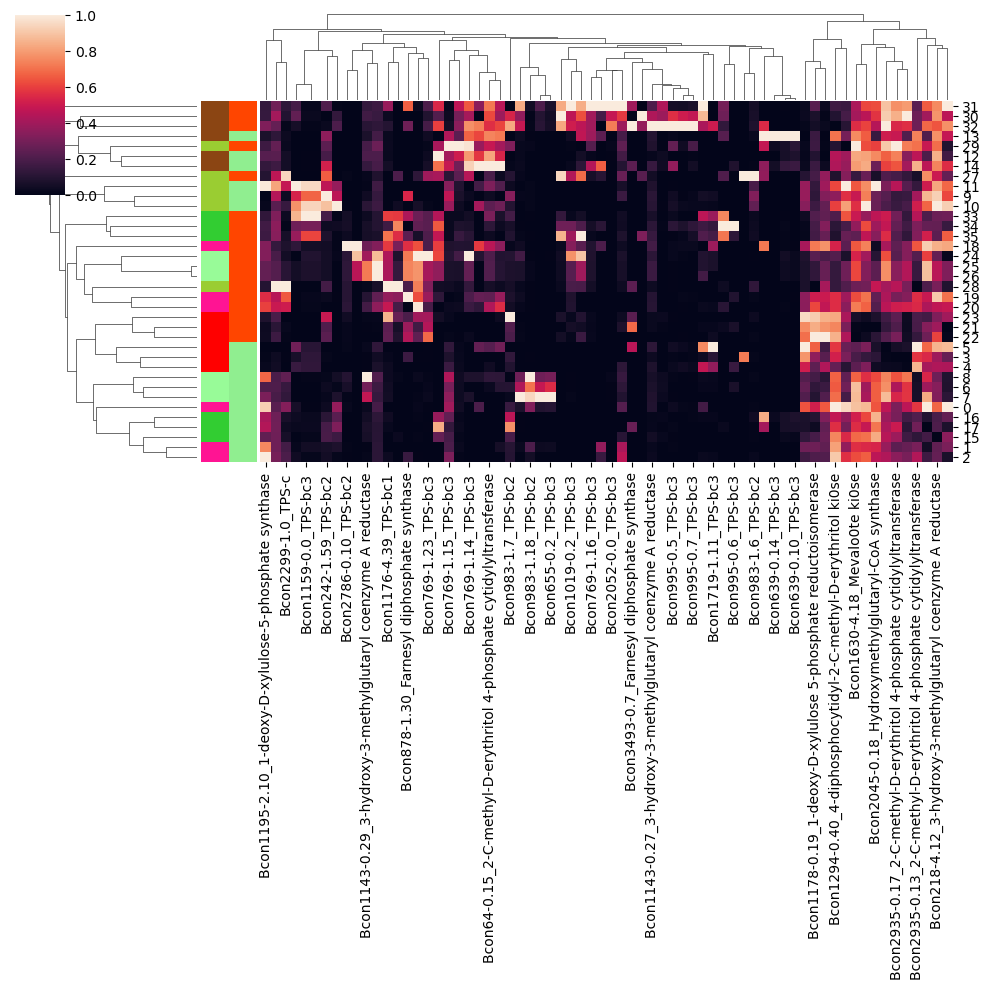

In [26]:
g=sns.clustermap(X, standard_scale = 1, row_colors=[row_colors, row_colors2])
plt.show()

The two species look very different.  Try plotting separate heatmaps for each species.

It's noteable that the hierchical clustering has NOT separated exactly by species or by tissue.
Does a kmeans approach do this?  To use kmeans we first need to do some dimension reduction, via PCA which we will cover in the next class.